# **Hyperparameter Tuning**

In [ ]:
from prophet import Prophet
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_absolute_error
import pandas as pd

In [ ]:
# Load dataset
data = pd.read_csv("/content/TESLA.csv")  # Ganti dengan dataset Anda
data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
data['ds'] = pd.to_datetime(data['ds'])
data['y'] = data['y']  # Pastikan kolom target sesuai

<ipython-input-2-d918c68de474>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['ds'] = pd.to_datetime(data['ds'])


In [ ]:
train_data = data[:-30]  # Gunakan data sebelum 30 hari terakhir untuk pelatihan
test_data = data[-30:]   # Gunakan 30 hari terakhir untuk pengujian
print(len(train_data))
print(len(test_data))

3607
30


In [ ]:
train_data.head()

,Unnamed: 0,ds,Open,High,Low,y,Adj Close,Volume
0,0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [ ]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'growth': ['linear', 'logistic'],
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_mode': ['additive', 'multiplicative'],
    'seasonality_prior_scale': [5.0, 10.0, 20.0],
}

# Generate all combinations of parameters
grid = ParameterGrid(param_grid)

In [ ]:
# Function to evaluate the model
def evaluate_prophet_model(params, train_data, test_data):
    try:
        # Create the Prophet model with specified parameters
        model = Prophet(
            growth=params['growth'],
            changepoint_prior_scale=params['changepoint_prior_scale'],
            seasonality_mode=params['seasonality_mode'],
            seasonality_prior_scale=params['seasonality_prior_scale']
        )

        # Logistic growth requires 'cap' column
        if params['growth'] == 'logistic':
            train_data['cap'] = train_data['y'].max() * 1.2  # Misalnya, 20% di atas nilai maksimum
            test_data['cap'] = train_data['cap'].iloc[0]

        # Fit the model
        model.fit(train_data)

        # Make future dataframe and predictions
        future = model.make_future_dataframe(periods=len(test_data))
        if params['growth'] == 'logistic':
            future['cap'] = train_data['cap'].iloc[0]
        forecast = model.predict(future)

        # Evaluate predictions
        test_y = test_data['y'].values
        pred_y = forecast['yhat'][-len(test_data):].values
        mae = mean_absolute_error(test_y, pred_y)  # Mean Absolute Error
        return mae

    except Exception as e:
        print(f"Error with parameters {params}: {e}")
        return float('inf')  # Return a large value for error cases

In [ ]:
# Perform grid search
best_params = None
best_score = float('inf')

for params in grid:
    print(f"Evaluating parameters: {params}")
    mae = evaluate_prophet_model(params, train_data.copy(), test_data.copy())
    print(f"MAE: {mae}")

    # Update best parameters if score improves
    if mae < best_score:
        best_params = params
        best_score = mae

Evaluating parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'seasonality_mode': 'additive', 'seasonality_prior_scale': 5.0}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/4ff5ltb6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/kswnh_5r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22711', 'data', 'file=/tmp/tmpo9cahvox/4ff5ltb6.json', 'init=/tmp/tmpo9cahvox/kswnh_5r.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_modelslmid8zs/prophet_model-20250126071321.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9

MAE: 128.40729748992246
Evaluating parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/mwwsc0me.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73781', 'data', 'file=/tmp/tmpo9cahvox/z04y1w4i.json', 'init=/tmp/tmpo9cahvox/mwwsc0me.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_modelwhou14j5/prophet_model-20250126071323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/viok6grf.json


MAE: 130.24547758142577
Evaluating parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'seasonality_mode': 'additive', 'seasonality_prior_scale': 20.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/0c2pqsz8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4582', 'data', 'file=/tmp/tmpo9cahvox/viok6grf.json', 'init=/tmp/tmpo9cahvox/0c2pqsz8.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_model79shqj94/prophet_model-20250126071325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/s1ebu0e_.json


MAE: 126.83022047938285
Evaluating parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 5.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/c5l0ns6u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4029', 'data', 'file=/tmp/tmpo9cahvox/s1ebu0e_.json', 'init=/tmp/tmpo9cahvox/c5l0ns6u.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_modeleufndjgu/prophet_model-20250126071328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/qsymaqr2.json


MAE: 288.25059221722205
Evaluating parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/5lvyp3vc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7131', 'data', 'file=/tmp/tmpo9cahvox/qsymaqr2.json', 'init=/tmp/tmpo9cahvox/5lvyp3vc.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_modelhnnzk5lf/prophet_model-20250126071330.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/0iy2pufr.json


MAE: 291.5051591266108
Evaluating parameters: {'changepoint_prior_scale': 0.01, 'growth': 'linear', 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 20.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/jhyy0y4y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32725', 'data', 'file=/tmp/tmpo9cahvox/0iy2pufr.json', 'init=/tmp/tmpo9cahvox/jhyy0y4y.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_model79hiy84v/prophet_model-20250126071332.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/qkw9h7kc.json


MAE: 299.91201278028194
Evaluating parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'seasonality_mode': 'additive', 'seasonality_prior_scale': 5.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/ivlrn_u8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14871', 'data', 'file=/tmp/tmpo9cahvox/qkw9h7kc.json', 'init=/tmp/tmpo9cahvox/ivlrn_u8.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_modeln_77s4dt/prophet_model-20250126071335.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/l4vgit8b.json


MAE: 49.78772313700295
Evaluating parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/y54neyym.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24483', 'data', 'file=/tmp/tmpo9cahvox/l4vgit8b.json', 'init=/tmp/tmpo9cahvox/y54neyym.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_modeltcfr9v7u/prophet_model-20250126071348.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/hrsp1uh3.json


MAE: 49.79140492879752
Evaluating parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'seasonality_mode': 'additive', 'seasonality_prior_scale': 20.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/w53b9atx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20646', 'data', 'file=/tmp/tmpo9cahvox/hrsp1uh3.json', 'init=/tmp/tmpo9cahvox/w53b9atx.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_model0c9k57iu/prophet_model-20250126071401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/q6gweb1y.json


MAE: 49.74957180049943
Evaluating parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 5.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/5rd9e8oz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33905', 'data', 'file=/tmp/tmpo9cahvox/q6gweb1y.json', 'init=/tmp/tmpo9cahvox/5rd9e8oz.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_model5h_obm5x/prophet_model-20250126071414.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/5s0jfsek.json


MAE: 313.9879472434073
Evaluating parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/p1_eemrz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73210', 'data', 'file=/tmp/tmpo9cahvox/5s0jfsek.json', 'init=/tmp/tmpo9cahvox/p1_eemrz.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_modelz_p4xj3e/prophet_model-20250126071427.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/fmq2n43b.json


MAE: 310.12055624195636
Evaluating parameters: {'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 20.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/bxy7gcmq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40791', 'data', 'file=/tmp/tmpo9cahvox/fmq2n43b.json', 'init=/tmp/tmpo9cahvox/bxy7gcmq.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_modelxxqf35m2/prophet_model-20250126071440.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/iwwsyiy_.json


MAE: 313.3000315795449
Evaluating parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'seasonality_mode': 'additive', 'seasonality_prior_scale': 5.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/v5q261_w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80439', 'data', 'file=/tmp/tmpo9cahvox/iwwsyiy_.json', 'init=/tmp/tmpo9cahvox/v5q261_w.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_model8ohd5wim/prophet_model-20250126071454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/2dtgce67.json


MAE: 136.9386601136025
Evaluating parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/ugdforcz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72533', 'data', 'file=/tmp/tmpo9cahvox/2dtgce67.json', 'init=/tmp/tmpo9cahvox/ugdforcz.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_modelregegzrl/prophet_model-20250126071456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/wabqkr_s.json


MAE: 137.37597119571197
Evaluating parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'seasonality_mode': 'additive', 'seasonality_prior_scale': 20.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/h5clzim1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30708', 'data', 'file=/tmp/tmpo9cahvox/wabqkr_s.json', 'init=/tmp/tmpo9cahvox/h5clzim1.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_modeljijnz9gg/prophet_model-20250126071459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/k3o27x33.json


MAE: 136.85186647884277
Evaluating parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 5.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/4rb26bzz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97992', 'data', 'file=/tmp/tmpo9cahvox/k3o27x33.json', 'init=/tmp/tmpo9cahvox/4rb26bzz.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_modeleyk77ye6/prophet_model-20250126071502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/t9yq8wmx.json


MAE: 308.1320589297746
Evaluating parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/913hkjrw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13945', 'data', 'file=/tmp/tmpo9cahvox/t9yq8wmx.json', 'init=/tmp/tmpo9cahvox/913hkjrw.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_model7hvnprj5/prophet_model-20250126071506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/6citsh08.json


MAE: 303.2607201681013
Evaluating parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 20.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/ccowcaw7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89735', 'data', 'file=/tmp/tmpo9cahvox/6citsh08.json', 'init=/tmp/tmpo9cahvox/ccowcaw7.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_modelz7o962jn/prophet_model-20250126071511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/pizcji5c.json


MAE: 297.9863164190899
Evaluating parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'seasonality_mode': 'additive', 'seasonality_prior_scale': 5.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/yqb4l5gi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41734', 'data', 'file=/tmp/tmpo9cahvox/pizcji5c.json', 'init=/tmp/tmpo9cahvox/yqb4l5gi.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_modelab5e1kbr/prophet_model-20250126071517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/282cxryu.json


MAE: 146.93789602416103
Evaluating parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/ttyn5a45.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26828', 'data', 'file=/tmp/tmpo9cahvox/282cxryu.json', 'init=/tmp/tmpo9cahvox/ttyn5a45.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_modelpyrfde6o/prophet_model-20250126071534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/jam2t1nx.json


MAE: 147.44422041031888
Evaluating parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'seasonality_mode': 'additive', 'seasonality_prior_scale': 20.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/v4u4ne2_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33259', 'data', 'file=/tmp/tmpo9cahvox/jam2t1nx.json', 'init=/tmp/tmpo9cahvox/v4u4ne2_.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_model74_f8_c6/prophet_model-20250126071551.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/0lcwdny_.json


MAE: 146.5484128284112
Evaluating parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 5.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/7i61mb4n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85856', 'data', 'file=/tmp/tmpo9cahvox/0lcwdny_.json', 'init=/tmp/tmpo9cahvox/7i61mb4n.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_modeln9p_dff3/prophet_model-20250126071608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/3_nvlnfj.json


MAE: 315.49258621405477
Evaluating parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/y5mz6zrc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25227', 'data', 'file=/tmp/tmpo9cahvox/3_nvlnfj.json', 'init=/tmp/tmpo9cahvox/y5mz6zrc.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_model8fohdeek/prophet_model-20250126071622.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/yesubx28.json


MAE: 315.5678528096769
Evaluating parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 20.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/01u9mo3e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4087', 'data', 'file=/tmp/tmpo9cahvox/yesubx28.json', 'init=/tmp/tmpo9cahvox/01u9mo3e.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_model8ihpln4y/prophet_model-20250126071638.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/i7s5yui4.json


MAE: 315.97423719886257
Evaluating parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'seasonality_mode': 'additive', 'seasonality_prior_scale': 5.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/a2sh2wjt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92732', 'data', 'file=/tmp/tmpo9cahvox/i7s5yui4.json', 'init=/tmp/tmpo9cahvox/a2sh2wjt.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_modelwv6160__/prophet_model-20250126071653.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/qqa9hvff.json


MAE: 140.98937627361528
Evaluating parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/365mlsf_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76463', 'data', 'file=/tmp/tmpo9cahvox/qqa9hvff.json', 'init=/tmp/tmpo9cahvox/365mlsf_.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_model1kvr_0cu/prophet_model-20250126071657.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/62_pazit.json


MAE: 140.94516337940956
Evaluating parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'seasonality_mode': 'additive', 'seasonality_prior_scale': 20.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/ocml4v6p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82973', 'data', 'file=/tmp/tmpo9cahvox/62_pazit.json', 'init=/tmp/tmpo9cahvox/ocml4v6p.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_modelreh66ad7/prophet_model-20250126071701.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/qpnzdpyy.json


MAE: 140.89500007939807
Evaluating parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 5.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/7ynaeu8h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10128', 'data', 'file=/tmp/tmpo9cahvox/qpnzdpyy.json', 'init=/tmp/tmpo9cahvox/7ynaeu8h.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_modelnj1xyw9g/prophet_model-20250126071705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/zsulmgle.json


MAE: 278.48293645213533
Evaluating parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/yk6v6whp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7462', 'data', 'file=/tmp/tmpo9cahvox/zsulmgle.json', 'init=/tmp/tmpo9cahvox/yk6v6whp.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_modeleo2vlqw2/prophet_model-20250126071709.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/p14zkqo6.json


MAE: 276.0807214543815
Evaluating parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 20.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/qs2yw7j0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31590', 'data', 'file=/tmp/tmpo9cahvox/p14zkqo6.json', 'init=/tmp/tmpo9cahvox/qs2yw7j0.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_modelmmznw8b9/prophet_model-20250126071712.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/eq0yk0gl.json


MAE: 259.9415946449612
Evaluating parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'seasonality_mode': 'additive', 'seasonality_prior_scale': 5.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/hxbbbqn5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55671', 'data', 'file=/tmp/tmpo9cahvox/eq0yk0gl.json', 'init=/tmp/tmpo9cahvox/hxbbbqn5.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_modeli0h8e0wg/prophet_model-20250126071715.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/zeq5puzd.json


MAE: 150.45771144222599
Evaluating parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/ixh0t74m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44558', 'data', 'file=/tmp/tmpo9cahvox/zeq5puzd.json', 'init=/tmp/tmpo9cahvox/ixh0t74m.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_modelldj6q6ez/prophet_model-20250126071729.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/drf6xes4.json


MAE: 151.7631043853177
Evaluating parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'seasonality_mode': 'additive', 'seasonality_prior_scale': 20.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/3z4mkd17.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13607', 'data', 'file=/tmp/tmpo9cahvox/drf6xes4.json', 'init=/tmp/tmpo9cahvox/3z4mkd17.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_model45e912u_/prophet_model-20250126071746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/fytydsxq.json


MAE: 148.9914882041072
Evaluating parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 5.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/w6nusgoa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48078', 'data', 'file=/tmp/tmpo9cahvox/fytydsxq.json', 'init=/tmp/tmpo9cahvox/w6nusgoa.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_modelvcsrzl5m/prophet_model-20250126071803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/_x96h1tv.json


MAE: 316.59087530174514
Evaluating parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/1sm6wwj7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7641', 'data', 'file=/tmp/tmpo9cahvox/_x96h1tv.json', 'init=/tmp/tmpo9cahvox/1sm6wwj7.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_modelau8atz5v/prophet_model-20250126071819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/qu7i4b4v.json


MAE: 316.50882769417075
Evaluating parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 20.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/r5m3v5j4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4224', 'data', 'file=/tmp/tmpo9cahvox/qu7i4b4v.json', 'init=/tmp/tmpo9cahvox/r5m3v5j4.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_modeliu7j30h1/prophet_model-20250126071834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 316.5157460816192


In [ ]:
# Display best parameters and score
print("\nBest Parameters:")
print(best_params)
print(f"Best MAE: {best_score}")


Best Parameters:
{'changepoint_prior_scale': 0.01, 'growth': 'logistic', 'seasonality_mode': 'additive', 'seasonality_prior_scale': 20.0}
Best MAE: 49.74957180049943


In [ ]:
import pickle

# Melatih kembali model dengan parameter terbaik
best_model = Prophet(
    growth=best_params['growth'],
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_mode=best_params['seasonality_mode'],
    seasonality_prior_scale=best_params['seasonality_prior_scale']
)

In [ ]:
# Logistic growth memerlukan 'cap' jika diterapkan
if best_params['growth'] == 'logistic':
    train_data['cap'] = train_data['y'].max() * 1.2

# Melatih model terbaik
best_model.fit(train_data)

<ipython-input-14-0abd1bac77ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['cap'] = train_data['y'].max() * 1.2
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/6xp_19jk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9cahvox/lvbmwog5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49647', 'data', 'file=/tmp/tmpo9cahvox/6xp_19jk.json', 'init=/tmp/tmpo9cahvox/lvbmwog5.json', 'output', 'file=/tmp/tmpo9cahvox/prophet_model4j0hh13w/prophet_model-20250126071944.csv', 'method=optimize'

In [ ]:
# Menyimpan model terbaik ke dalam file pickle
model_filename = "best_prophet_model.pkl"
with open(model_filename, 'wb') as model_file:
    pickle.dump(best_model, model_file)

print(f"Model terbaik disimpan sebagai {model_filename}.")

Model terbaik disimpan sebagai best_prophet_model.pkl.


In [ ]:
# Path ke model yang telah disimpan
model_path = "/content/best_prophet_model.pkl"

# Memuat model Prophet yang telah disimpan
with open(model_path, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Menampilkan pesan bahwa model berhasil dimuat
print("Model Prophet berhasil dimuat.")

Model Prophet berhasil dimuat.


In [ ]:
# Membuat data untuk prediksi (jumlah hari ke depan yang ingin diprediksi)
prediction_days = 365  # Anda bisa mengganti jumlah hari sesuai kebutuhan
future = loaded_model.make_future_dataframe(periods=prediction_days)

# Jika model menggunakan pertumbuhan logistic, tambahkan kolom 'cap'
if loaded_model.growth == 'logistic':
    cap_value = train_data['y'].max() * 1.2  # Sesuaikan dengan data historis
    future['cap'] = cap_value

# Melakukan prediksi
forecast = loaded_model.predict(future)

In [ ]:
# Menampilkan hasil prediksi
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(prediction_days))

             ds        yhat  yhat_lower  yhat_upper
3607 2024-10-26  369.224825  302.134712  438.382544
3608 2024-10-27  369.729995  300.970600  437.843353
3609 2024-10-28  291.155104  220.414260  361.902672
3610 2024-10-29  291.575716  225.296764  357.512005
3611 2024-10-30  292.298510  224.281647  359.705707
...         ...         ...         ...         ...
3967 2025-10-21  323.839660  253.936390  386.287405
3968 2025-10-22  324.614678  259.681188  388.881264
3969 2025-10-23  324.523747  256.110156  391.758008
3970 2025-10-24  324.328166  258.999645  392.455871
3971 2025-10-25  404.961276  336.564601  471.165358

[365 rows x 4 columns]


<Figure size 1000x600 with 0 Axes>

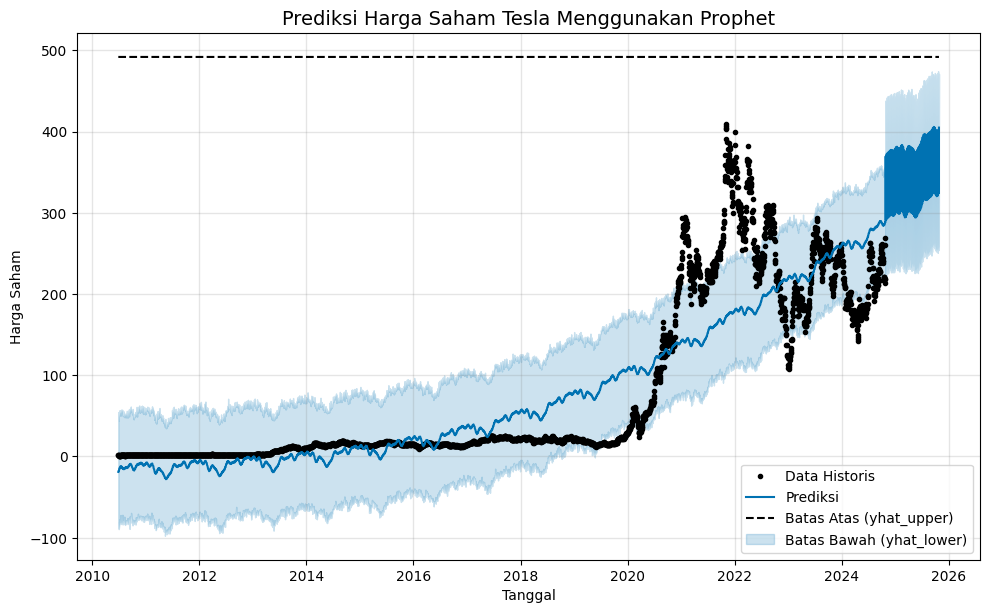

In [ ]:
# Visualisasi hasil prediksi
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Plot utama Prophet
fig = loaded_model.plot(forecast, xlabel="Tanggal", ylabel="Harga Saham", figsize=(10, 6))

# Menambahkan legenda
plt.legend(
    ["Data Historis", "Prediksi", "Batas Atas (yhat_upper)", "Batas Bawah (yhat_lower)"],
    loc="lower right",
    fontsize=10
)
# Menambahkan judul
plt.title("Prediksi Harga Saham Tesla Menggunakan Prophet", fontsize=14)
# Menampilkan grafik
plt.show()